In [9]:
import pandas as pd
from scipy import stats
import os
import numpy as np

In [10]:
names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip", "atac_obs", "dnase_obs"]

celltypes = ["GM12878", "K562", "HEPG2", "H1ESC"]
main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/new_output_oct_25/"
method=[]
celltype=[]
pearsonrs=[]
for cl in celltypes:
    pairs = os.listdir(main_dir+cl)
    for pair in pairs:
        beds = os.listdir(main_dir+cl+"/"+pair)
        pair_pp = []
        print(pair)
        print("\n")
        for bed in beds:
            data = pd.read_csv(main_dir+cl+"/"+pair+"/"+bed, sep='\t', names=names)
            if data.shape[0] > 200:            
                data["label"] = True
                
                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), np.log(data[data["label"]]["atac_obs"].abs()+1))[0])
                celltype.append(cl)
                method.append("ATAC Observed log counts")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), np.log(data[data["label"]]["dnase_obs"].abs()+1))[0])
                celltype.append(cl)
                method.append("DNase Observed log counts")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), np.log(data[data["label"]]["tobias"].abs()))[0])
                celltype.append(cl)
                method.append("TOBIAS score")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["atac_counts"].abs())[0])
                print(pearsonrs[-1])
                print(cl , bed)
                celltype.append(cl)
                method.append("ChromBPNet ATAC counts contrib")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["atac_profile"].abs())[0])
                celltype.append(cl)
                method.append("ChromBPNet ATAC profile contrib")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["dnase_counts"].abs())[0])
                print(pearsonrs[-1])
                print(cl , bed)
                celltype.append(cl)
                method.append("ChromBPNet DNase counts contrib")

                pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["dnase_profile"].abs())[0])
                celltype.append(cl)
                method.append("ChromBPNet DNase profile contrib")

pattern_16_BATF


0.8604260545506243
GM12878 ENCSR000BGT.bed
0.8484011610130047
GM12878 ENCSR000BGT.bed
pattern_10_RELB


0.8876216942804459
GM12878 ENCSR387QUV.bed
0.8686304643201151
GM12878 ENCSR387QUV.bed
pattern_17_ZNF143


0.7873995479054074
GM12878 ENCSR936XTK.bed
0.8037495066326864
GM12878 ENCSR936XTK.bed
0.7982702267093601
GM12878 ENCSR000DZL.bed
0.8153124045855318
GM12878 ENCSR000DZL.bed
pattern_4_BATF.JUNB


0.8346620804783632
GM12878 ENCSR000BGT.bed
0.8399835231874304
GM12878 ENCSR000BGT.bed
0.8591051800751244
GM12878 ENCSR897MMC.bed
0.8522039357335064
GM12878 ENCSR897MMC.bed
pattern_5_RELB


0.8704128593105382
GM12878 ENCSR387QUV.bed
0.856087930542627
GM12878 ENCSR387QUV.bed
pattern_8_SP1


0.7170118381662245
GM12878 ENCSR000BHK.bed
0.7481261716379426
GM12878 ENCSR000BHK.bed
pattern_2_SPI1


0.8195769584013904
GM12878 ENCSR000BGQ.bed
0.8453709286063215
GM12878 ENCSR000BGQ.bed
pattern_3_RUNX3


0.7726292786585596
GM12878 ENCSR000BRI.bed
0.7741894580694462
GM12878 ENCSR000BRI

0.7670264530554896
HEPG2 ENCSR000BGK.bed
0.839256128494715
HEPG2 ENCSR000BGK.bed
pattern_20_ATF4


0.40112010903853224
HEPG2 ENCSR288ZFV.bed
0.496563625088032
HEPG2 ENCSR288ZFV.bed
pattern_9_CEBPB


0.6742828250668486
HEPG2 ENCSR000EEE.bed
0.7255847439688247
HEPG2 ENCSR000EEE.bed
0.7085930572855104
HEPG2 ENCSR000BQI.bed
0.758308531159696
HEPG2 ENCSR000BQI.bed
pattern_3_SP5


0.6621863640492818
HEPG2 ENCSR019NPF.bed
0.695748382189217
HEPG2 ENCSR019NPF.bed
pattern_7_NFYB


0.6530267161316773
HEPG2 ENCSR935GZV.bed
0.6662290424290365
HEPG2 ENCSR935GZV.bed
pattern_13_FOXA2


0.8041133889748295
HEPG2 ENCSR000BNI.bed
0.8465713110005623
HEPG2 ENCSR000BNI.bed
0.7695498204848786
HEPG2 ENCSR066EBK.bed
0.8112062035536375
HEPG2 ENCSR066EBK.bed
0.8524773193164861
HEPG2 ENCSR490AMH.bed
0.8875239690483738
HEPG2 ENCSR490AMH.bed
pattern_8_GABPA


0.7634135561668168
HEPG2 ENCSR269TNX.bed
0.7690828009635599
HEPG2 ENCSR269TNX.bed
0.7528996696227729
HEPG2 ENCSR000BJK.bed
0.7364272456819556
HEPG2 ENCSR000BJK

In [11]:
dicts = {"method":method, "celltype":celltype, "pearsonrs":pearsonrs}
df = pd.DataFrame(dicts) 



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 

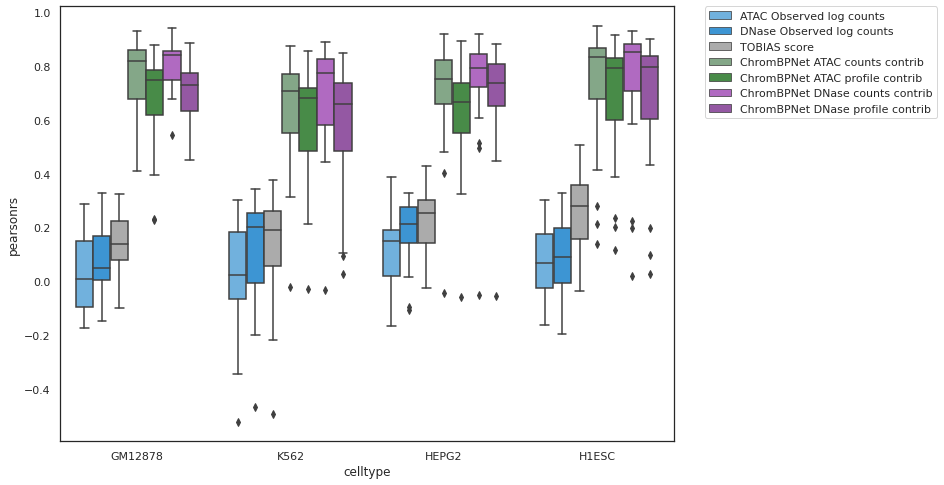

In [13]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_theme(style='white')
my_pal = {"ATAC Observed log counts": "#5FB4EF", "DNase Observed log counts": "#249AEC", "TOBIAS score": "#ABABAB",
         "ChromBPNet ATAC counts contrib": "#7EAD84", "ChromBPNet ATAC profile contrib":"#3D963D",
         "ChromBPNet DNase counts contrib": "#B95BD0", "ChromBPNet DNase profile contrib":"#9B4CAF"}

sns.boxplot(data=df, x="celltype", y="pearsonrs", hue="method", palette=my_pal)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("box_plot_summary_oct25.pdf", dpi=300, transparent=True)


In [6]:
#plt.scatter(data[data["label"]]["chip"], data[data["label"]]["tobias"])

In [7]:
cl="HEPG2"
pp="pattern_0_CTCF"
bed="ENCSR607XFI.bed"

main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/new_output_jan_18/"
data = pd.read_csv(main_dir+cl+"/"+pp+"/"+bed, sep='\t', names=names)
data["label"]=True
data = data[data["label"]]

data["atac_obs_log"] = np.log(data["atac_obs"]+1)
data["dnase_obs_log"] = np.log(data["dnase_obs"]+1)
import scipy.stats

def make_plot(keyd, data, color, savef, ax):
    sns.kdeplot(
        ax=ax,
        data=data,
        x="chip",
        y=keyd,
        levels=5,
        fill=False,
        alpha=0.2,
        color="grey",
        cut=2,

    )

    sns.scatterplot(ax=ax, data=data, x="chip", y=keyd, s=2, color = color, rasterized=True)
    
    sns.regplot(ax=ax, x="chip", y=keyd, data=data, scatter=False, ci=None)
    ppr = scipy.stats.pearsonr(data[keyd], data["chip"])
    print(ppr)
    print(scipy.stats.pearsonr(data[keyd], data["chip"]))
    ax.set_title("Pearsonr: " + str(np.round(ppr[0],2)) + " pval: "+str(ppr[1]))
    ax.spines[['right', 'top']].set_visible(False)

    #plt.savefig(savef, dpi=300, transparent=True)


(-0.18086215416166662, 0.0)
(-0.18086215416166662, 0.0)
(0.16642574384940967, 7.096694237843031e-286)
(0.16642574384940967, 7.096694237843031e-286)
(0.03208241419767897, 4.565729012153472e-12)
(0.03208241419767897, 4.565729012153472e-12)
(0.8930665166152065, 0.0)
(0.8930665166152065, 0.0)
(0.8786421701049235, 0.0)
(0.8786421701049235, 0.0)
(0.8856573978021649, 0.0)
(0.8856573978021649, 0.0)
(0.8656772518164385, 0.0)
(0.8656772518164385, 0.0)


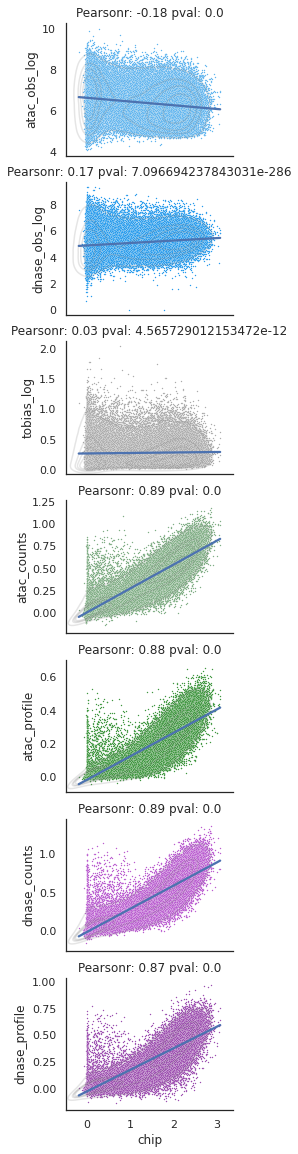

In [8]:

fig, axes = plt.subplots(7, 1, figsize=(3, 20), sharex=True)

make_plot("atac_obs_log", data, my_pal["ATAC Observed log counts"], "pearsonr_ctcf_obs.pdf", axes[0])
make_plot("dnase_obs_log", data, my_pal["DNase Observed log counts"], "pearsonr_ctcf_obs_dnase.pdf", axes[1])
data["tobias_log"] = np.log(data["tobias"]+1)
make_plot("tobias_log", data, my_pal["TOBIAS score"], "pearsonr_ctcf_tobias.pdf", axes[2])
make_plot("atac_counts", data, my_pal["ChromBPNet ATAC counts contrib"], "pearsonr_ctcf_counts.pdf", axes[3])
make_plot("atac_profile", data, my_pal["ChromBPNet ATAC profile contrib"], "pearsonr_ctcf_profile.pdf", axes[4])
make_plot("dnase_counts", data, my_pal["ChromBPNet DNase counts contrib"], "pearsonr_ctcf_counts_dnase.pdf", axes[5])
make_plot("dnase_profile", data, my_pal["ChromBPNet DNase profile contrib"], "pearsonr_ctcf_profile_dnase.pdf", axes[6])

#plt.savefig("all_plots.pdf", dpi=300, transparent=True)